2025-12-10 11:07:30.782768: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765382850.803727 4061794 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765382850.810207 4061794 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1765382850.826479 4061794 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765382850.826493 4061794 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1765382850.826496 4061794 computation_placer.cc:177] computation placer alr

Loading best model...


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

 Model loaded!
   Using: CFG=10.0, Steps=40
------------------------------------------------------------


Enter your prompt:  Doberman dog



 Generating: Doberman dog


  0%|          | 0/40 [00:00<?, ?it/s]

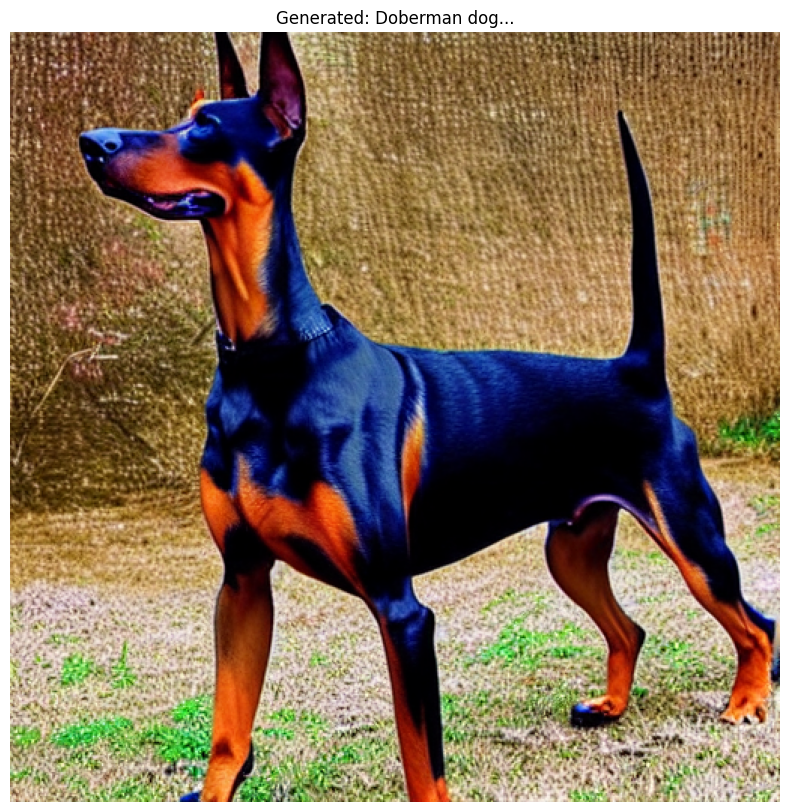

 Image saved as: generated_110759.png


In [1]:
import torch
import json
from diffusers import StableDiffusionPipeline
from datetime import datetime
import matplotlib.pyplot as plt


MODEL_PATH = "models/best_evaluated_model"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("Loading best model...")


with open(f"{MODEL_PATH}/best_config.json", "r") as f:
    config = json.load(f)


pipe = StableDiffusionPipeline.from_pretrained(
    MODEL_PATH,
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32
).to(DEVICE)

print(f" Model loaded!")
print(f"   Using: CFG={config['best_cfg']}, Steps={config['num_steps']}")
print("-" * 60)


prompt = input("Enter your prompt: ")

if prompt.strip():
    print(f"\n Generating: {prompt}")
    
   
    image = pipe(
        prompt,
        num_inference_steps=config['num_steps'],
        guidance_scale=config['best_cfg']
    ).images[0]
    

    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title(f"Generated: {prompt[:50]}...")
    plt.axis('off')
    plt.show()
    
  
    filename = f"generated_{datetime.now().strftime('%H%M%S')}.png"
    image.save(filename)
    
    print(f" Image saved as: {filename}")
else:
    print("No prompt entered!")